In [1]:
! pip install pandas

In [2]:
import pandas as pd
df = pd.read_csv(r'D:\Projects\clickstream_data\train_data.csv')

In [3]:
df

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,P19,2,1,1,48,1,2
132375,2008,6,19,9,29,15165,3,C26,14,3,1,28,2,2
132376,2008,7,15,4,29,19359,1,A4,3,2,2,38,2,1
132377,2008,7,28,16,29,21454,3,C50,9,5,2,20,2,3


In [4]:
import pickle
le = pickle.load(open('D:\Projects\clickstream_data\le1_clothing_model.pkl', 'rb'))

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\abina\AppData\Local\Temp\ipykernel_3884\287368395.py:2: SyntaxWarning: invalid escape sequence '\P'
  le = pickle.load(open('D:\Projects\clickstream_data\le1_clothing_model.pkl', 'rb'))


In [5]:
df['page2_clothing_model'] = le.transform(df['page2_clothing_model'])

In [6]:
import matplotlib.pyplot as plt


In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot

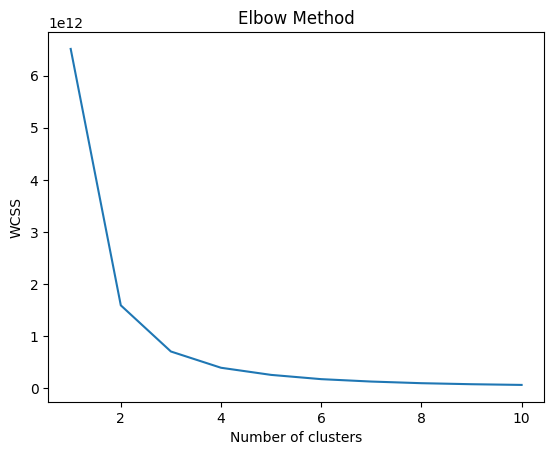

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plot

X = df.drop(['year'], axis=1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
k = 4

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(X)

display(df)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,cluster
0,2008,6,22,21,29,15648,3,88,13,1,2,48,1,2,2
1,2008,5,19,6,29,10018,2,60,13,3,1,57,1,2,3
2,2008,7,15,2,29,19388,3,80,9,5,1,48,1,1,1
3,2008,5,2,2,29,7181,2,45,2,4,1,43,2,1,3
4,2008,6,9,16,29,13493,2,66,9,5,1,57,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,145,2,1,1,48,1,2,2
132375,2008,6,19,9,29,15165,3,94,14,3,1,28,2,2,2
132376,2008,7,15,4,29,19359,1,33,3,2,2,38,2,1,1
132377,2008,7,28,16,29,21454,3,121,9,5,2,20,2,3,1


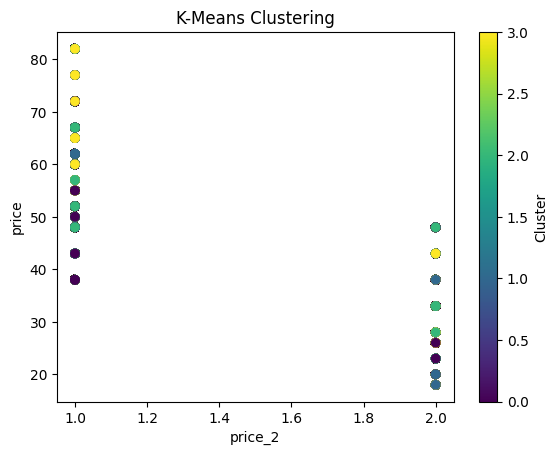

In [10]:
plt.scatter(df['price_2'], df['price'], c=df['cluster'])
plt.title('K-Means Clustering')
plt.xlabel('price_2')
plt.ylabel('price')
plt.colorbar(label='Cluster')
plt.show()

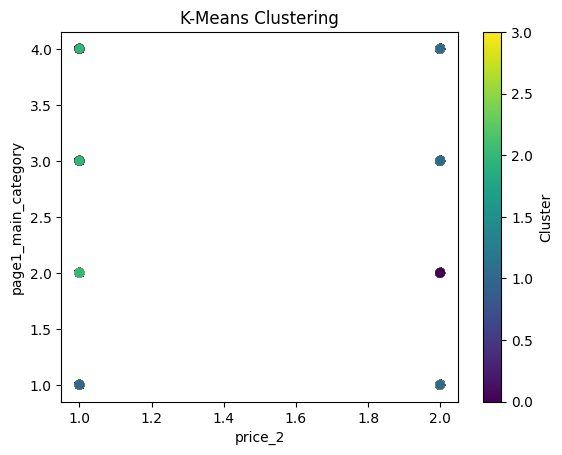

In [11]:
plt.scatter(df['price_2'], df['page1_main_category'], c=df['cluster'])
plt.title('K-Means Clustering')
plt.xlabel('price_2')
plt.ylabel('page1_main_category')
plt.colorbar(label='Cluster')
plt.show()

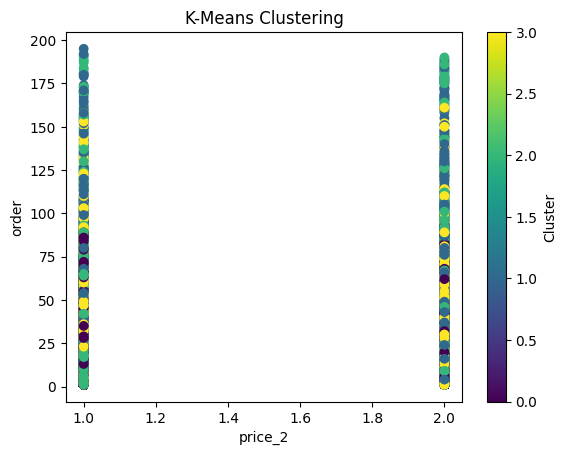

In [12]:
plt.scatter(df['price_2'], df['order'], c=df['cluster'])
plt.title('K-Means Clustering')
plt.xlabel('price_2')
plt.ylabel('order')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
from sklearn.cluster import DBSCAN

X = df.drop(['year'], axis=1)

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['cluster'] = dbscan.fit_predict(X)

display(df)

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,cluster
0,2008,6,22,21,29,15648,3,88,13,1,2,48,1,2,-1
1,2008,5,19,6,29,10018,2,60,13,3,1,57,1,2,-1
2,2008,7,15,2,29,19388,3,80,9,5,1,48,1,1,-1
3,2008,5,2,2,29,7181,2,45,2,4,1,43,2,1,-1
4,2008,6,9,16,29,13493,2,66,9,5,1,57,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,145,2,1,1,48,1,2,-1
132375,2008,6,19,9,29,15165,3,94,14,3,1,28,2,2,-1
132376,2008,7,15,4,29,19359,1,33,3,2,2,38,2,1,-1
132377,2008,7,28,16,29,21454,3,121,9,5,2,20,2,3,-1


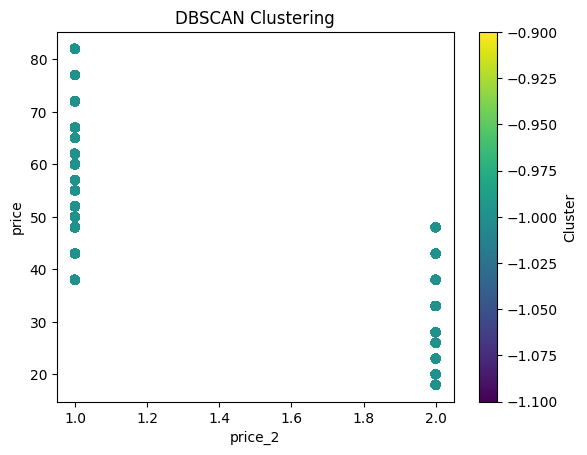

In [14]:
plt.scatter(df['price_2'], df['price'], c=df['cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('price_2')
plt.ylabel('price')
plt.colorbar(label='Cluster')
plt.show()

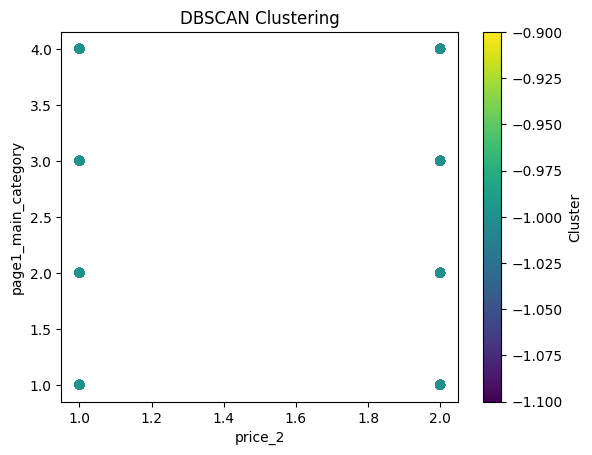

In [15]:
plt.scatter(df['price_2'], df['page1_main_category'], c=df['cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('price_2')
plt.ylabel('page1_main_category')
plt.colorbar(label='Cluster')
plt.show()

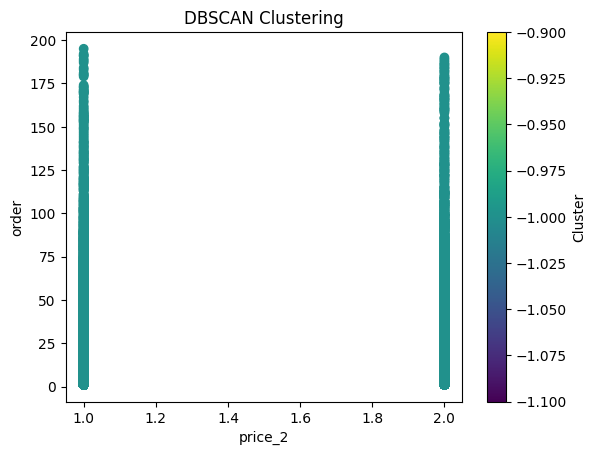

In [16]:
plt.scatter(df['price_2'], df['order'], c=df['cluster'])
plt.title('DBSCAN Clustering')
plt.xlabel('price_2')
plt.ylabel('order')
plt.colorbar(label='Cluster')
plt.show()

Silhouette Score: 0.3016475946870097
Davies-Bouldin Index: 1.0597430529573644
Within-Cluster Sum of Squares (WCSS): 23136592.30047791


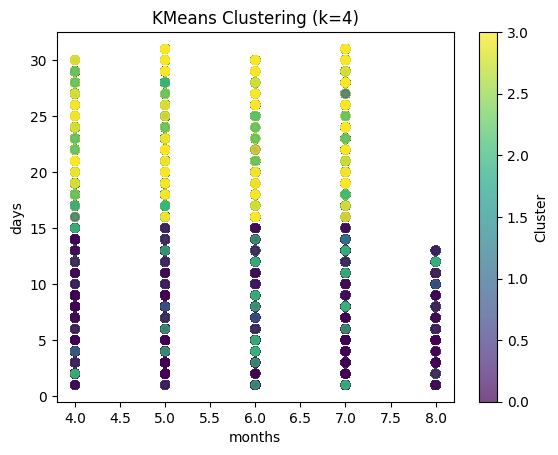

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt




X = df[['month', 'day', 'page1_main_category', 'order', 'price','price_2']]

# Initialize KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)  # Set random_state for reproducibility

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels
# Get cluster labels
labels = kmeans.labels_

# Calculate clustering metrics
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)
wcss = kmeans.inertia_

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Within-Cluster Sum of Squares (WCSS): {wcss}")

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Visualize the clusters
scatter = plt.scatter(df['month'], df['day'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('months')
plt.ylabel('days')
plt.title('KMeans Clustering (k=4)')
plt.colorbar(scatter, label='Cluster')
plt.show()